In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib  as mpl
%matplotlib inline
from datetime import datetime

I analyze bank transactions in India

In [2]:
# download data
df = pd.read_csv('path_to_file', low_memory=0, parse_dates= ['trdate'])

In [3]:
# glimpse on data, there is no nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910759 entries, 0 to 910758
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   age          910759 non-null  int64         
 1   gender       910759 non-null  int64         
 2   acc_balance  910759 non-null  float64       
 3   trdate       910759 non-null  datetime64[ns]
 4   amount       910759 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 34.7 MB


*Amount - amount of transaction, gender: male - 1, female - 0.

In [4]:
# delete date column
df = df.drop(columns='trdate')

In [5]:
# import libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [6]:
# transform data and standardize it 
train = df
scaler = StandardScaler()
train = scaler.fit_transform(train)
train = pd.DataFrame(train)
train.columns = ['age', 'gender', 'acc_balance','amount']

In [7]:
# first way to draw elbow plot to get appropriate number of clusters
wcss=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)

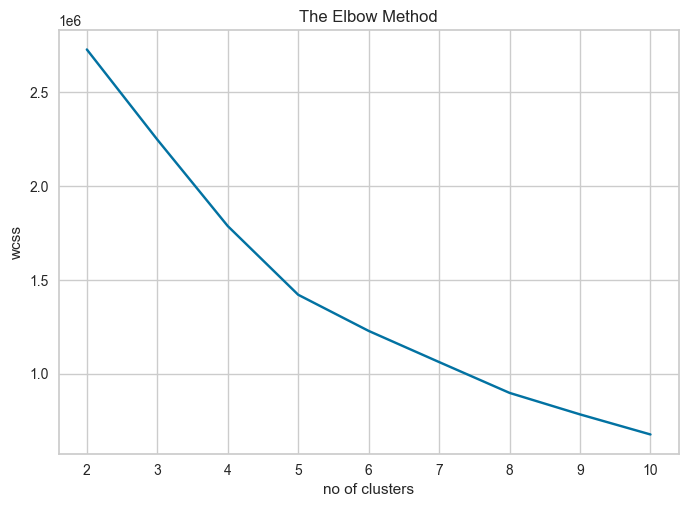

In [8]:
# Elbow plot, we need 5 clusters
plt.plot(range(2,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

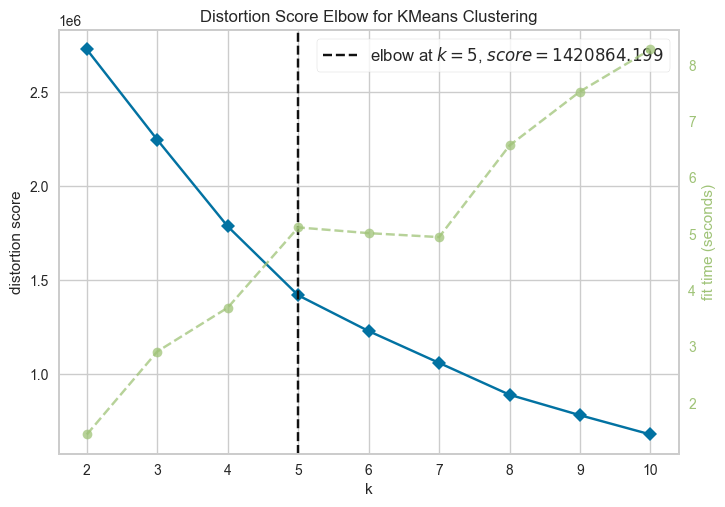

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# second way to draw Elbow plot, we need 5 clusters
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(train)
Elbow.show()

In [10]:
# we cluster the data
X = train
kmeansmodel = KMeans(n_clusters= Elbow.elbow_value_, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [11]:
# add clusters to initial dataframe
df['clust'] = y_kmeans

In [12]:
# glimpse on descriptive statistics of the clusters
round(df.groupby('clust').median(), 1)

,age,gender,acc_balance,amount
clust,,,,
0,33.0,0.0,18253.1,499.0
1,32.0,1.0,10412.6,287.0
2,42.0,1.0,25742.0,599.0
3,42.0,1.0,5473507.6,1375.6
4,38.0,1.0,80334.2,50000.0


Zero-cluster: 33 year old women with 18 253 rupies account balance, and median transaction for 499 rupies.
First: 32 year old men with 10 412 rupies account balance, and median transaction for 287 rupies.
Second: 42 year old men with 25 742 rupies account balance, and median transaction for 599 rupies.
Third: 42 year old men with 5 473 507 rupies account balance, and median transaction for 1 376 rupies.
Forth: 38 year old men with 80 334 rupies account balance, and median transaction for 50 000 rupies.